# 01 - Limpeza de Dados
Autora: Fernanda Baptista de Siqueira  
Curso: MBA em Tecnologia para Negócios – AI, Data Science e Big Data  
Tema: Análise de Acidentes de Trânsito em Porto Alegre (2020–2024)  
Origem DataFrame: Equipe Armazém de Dados de Mobilidade - EAMOB/CIET  
https://dadosabertos.poa.br/dataset/acidentes-de-transito-acidentes (11/05/2025)  

### 1. Importa bibliotecas

In [2]:
from config import (
    pd, np, plt, sns, px, os,
    warnings, resumo_df, checar_nulos,
    salvar_grafico, salvar_parquet,
    proporcao_por_veiculo, evolucao_veiculos,
    grafico_categorico, grafico_numerico,
    plota_heatmap
)


### 2. Leitura e Schema Inicial
1) Carrega o arquivo `acidentes.csv`


In [1]:
caminho_dados = '../dados/primarios/acidentes.csv'

try:
    df = pd.read_csv(
        caminho_dados,
        sep=';',
        encoding='utf-8',
        low_memory=False,
        dtype=str
        )
    print(f"CSV original lido com sucesso!")
except FileNotFoundError:
    print(f"Erro: Arquivo '{caminho_dados}' não encontrado. Verifique o caminho.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Ocorreu um erro: name 'pd' is not defined


2) Entende e inspeciona DataFrame

In [21]:
resumo_df(df)
checar_nulos(df)

Dimensões: (69521, 34)

Tipos de dados:
data_extracao    object
predial1         object
queda_arr        object
data             object
feridos          object
feridos_gr       object
mortes           object
morte_post       object
fatais           object
auto             object
taxi             object
lotacao          object
onibus_urb       object
onibus_met       object
onibus_int       object
caminhao         object
moto             object
carroca          object
bicicleta        object
outro            object
cont_vit         object
ups              object
patinete         object
idacidente       object
longitude        object
latitude         object
log1             object
log2             object
tipo_acid        object
dia_sem          object
hora             object
noite_dia        object
regiao           object
consorcio        object
dtype: object

Nulos por coluna:
data_extracao        0
predial1          4079
queda_arr            0
data                 0
feridos            

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2025-06-01 01:33:13,0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,5,0,190816,0,0,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2025-06-01 01:33:13,598,0.0,2020-01-01 00:00:00,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,5,0,669089,NaN,NaN,AV BENTO GONCALVES,NaN,ABALROAMENTO,QUARTA-FEIRA,03:00:00.0000000,NOITE,LESTE,NaN
2,2025-06-01 01:33:13,1271,0.0,2020-01-01 00:00:00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,0,669097,NaN,NaN,AV INDEPENDENCIA,NaN,ATROPELAMENTO,QUARTA-FEIRA,23:00:00.0000000,NOITE,LESTE,NaN
3,2025-06-01 01:33:13,1901,0.0,2020-01-02 00:00:00,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,5,0,669098,NaN,NaN,AV EDUARDO PRADO,NaN,ATROPELAMENTO,QUINTA-FEIRA,00:05:00.0000000,NOITE,SUL,NaN
4,2025-06-01 01:33:13,3302,0.0,2020-01-02 00:00:00,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,669099,-51.21153485762743,-30.081535213015123,AV TERESOPOLIS,NaN,ABALROAMENTO,QUINTA-FEIRA,09:00:00.0000000,DIA,SUL,NaN


Percentual de valores nulos por coluna (%):


consorcio       96.83
log2            72.42
latitude        14.82
longitude       14.82
predial1         5.87
hora             0.80
log1             0.07
data_extracao    0.00
queda_arr        0.00
data             0.00
taxi             0.00
lotacao          0.00
feridos          0.00
feridos_gr       0.00
mortes           0.00
morte_post       0.00
fatais           0.00
auto             0.00
carroca          0.00
moto             0.00
caminhao         0.00
onibus_int       0.00
onibus_met       0.00
onibus_urb       0.00
bicicleta        0.00
outro            0.00
patinete         0.00
idacidente       0.00
cont_vit         0.00
ups              0.00
dia_sem          0.00
tipo_acid        0.00
noite_dia        0.00
regiao           0.00
dtype: float64

### 3. Tratamento  
1) Limpa Nomes; remove colunas

In [22]:
# Remove espaços em branco no início/fim dos nomes, deixa no estilo Snake das colunas (boa prática)
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# Remove colunas não utilizadas
df = df.drop(columns=[
    'data_extracao', 'consorcio', 'latitude', 'longitude', 'mortes', 'morte_post'
    ], errors='ignore')

# Lista nome de colunas
print(df.columns)

Index(['predial1', 'queda_arr', 'data', 'feridos', 'feridos_gr', 'fatais',
       'auto', 'taxi', 'lotacao', 'onibus_urb', 'onibus_met', 'onibus_int',
       'caminhao', 'moto', 'carroca', 'bicicleta', 'outro', 'cont_vit', 'ups',
       'patinete', 'idacidente', 'log1', 'log2', 'tipo_acid', 'dia_sem',
       'hora', 'noite_dia', 'regiao'],
      dtype='object')


2) Transforma tipos; remove inválidos

In [24]:
# Converte 'data' para datetime
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# Remove inválidos 'data', 'hora', 'log1', 'regiao'
df = df.dropna(subset=['data', 'hora', 'log1', 'regiao'])

# Remove data fora do escopo (2020-2025)
df = df[(df['data'] >= '2020-01-01') & (df['data'] <= '2025-04-01')]
print("Datas fora do escopo (2020-2025) removidas com sucesso.")

# Remove chaves duplicadas
df = df.drop_duplicates(subset='idacidente')

# Padroniza nomes dos dias da semana
df["dia_sem"] = (
    df["dia_sem"]
    .str.title()                            # Deixa só a primeira letra maiúscula
    .str.replace("-Feira", "", regex=False) # Remove o sufixo "-Feira"
)

# Transforma colunas para Categoria
col_cat = ['regiao', 'tipo_acid', 'dia_sem', 'noite_dia']
df[col_cat] = df[col_cat].astype('category')

# Transforma colunas para Inteiro
col_int = [c for c in [
  'queda_arr', 'feridos', 'feridos_gr', 'mortes',
  'morte_post', 'fatais', 'auto', 'taxi', 'lotacao', 'onibus_urb',
  'onibus_met', 'onibus_int', 'caminhao', 'moto', 'carroca', 'bicicleta',
  'outro', 'cont_vit', 'ups', 'patinete', 'idacidente', 'predial1'
  ] if c in df.columns]
for c in col_int:
    df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int32')

# Transforma coluna para String
col_str = ['log1', 'log2']
df[col_str] = df[col_str].astype('string')

# Transforma coluna 'hora' para timedelta
df['hora'] = pd.to_timedelta(df['hora'], errors='coerce')

print("\nInformações após:")
resumo_df(df)
display(df.describe(include='all'))

Datas fora do escopo (2020-2025) removidas com sucesso.

Informações após:
Dimensões: (68837, 28)

Tipos de dados:
predial1                Int32
queda_arr               Int32
data           datetime64[ns]
feridos                 Int32
feridos_gr              Int32
fatais                  Int32
auto                    Int32
taxi                    Int32
lotacao                 Int32
onibus_urb              Int32
onibus_met              Int32
onibus_int              Int32
caminhao                Int32
moto                    Int32
carroca                 Int32
bicicleta               Int32
outro                   Int32
cont_vit                Int32
ups                     Int32
patinete                Int32
idacidente              Int32
log1           string[python]
log2           string[python]
tipo_acid            category
dia_sem              category
hora          timedelta64[ns]
noite_dia            category
regiao               category
dtype: object

Nulos por coluna:
predial1    

,predial1,queda_arr,data,feridos,feridos_gr,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao
0,0,0,2020-10-17,1,0,0,3,0,0,0,0,0,0,1,0,0,0,1,5,0,190816,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,Sábado,0 days 19:00:00,NOITE,NORTE
1,598,0,2020-01-01,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,5,0,669089,AV BENTO GONCALVES,<NA>,ABALROAMENTO,Quarta,0 days 03:00:00,NOITE,LESTE
2,1271,0,2020-01-01,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,5,0,669097,AV INDEPENDENCIA,<NA>,ATROPELAMENTO,Quarta,0 days 23:00:00,NOITE,LESTE
3,1901,0,2020-01-02,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,5,0,669098,AV EDUARDO PRADO,<NA>,ATROPELAMENTO,Quinta,0 days 00:05:00,NOITE,SUL
4,3302,0,2020-01-02,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,669099,AV TERESOPOLIS,<NA>,ABALROAMENTO,Quinta,0 days 09:00:00,DIA,SUL


,predial1,queda_arr,data,feridos,feridos_gr,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao
count,"64,799.00","68,837.00",68837,"68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00","68,837.00",68837,18975,68837,68837,68837,68837,68837
unique,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3803,2017,10,7,NaN,2,4
top,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,AV PROTASIO ALVES,AV IPIRANGA,ABALROAMENTO,Sexta,NaN,DIA,LESTE
freq,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2551,493,29316,11686,NaN,48944,21869
mean,"1,757.98",0.00,2022-11-07 08:27:28.415822592,0.45,0.08,0.01,1.43,0.01,0.01,0.03,0.01,0.01,0.08,0.32,0.00,0.02,0.00,0.39,2.60,0.00,"714,657.38",NaN,NaN,NaN,NaN,0 days 13:41:24.096052994,NaN,NaN
min,0.00,0.00,2020-01-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"190,816.00",NaN,NaN,NaN,NaN,0 days 00:00:00,NaN,NaN
25%,192.00,0.00,2021-09-06 00:00:00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"686,520.00",NaN,NaN,NaN,NaN,0 days 09:50:00,NaN,NaN
50%,767.00,0.00,2022-12-07 00:00:00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,"704,079.00",NaN,NaN,NaN,NaN,0 days 14:00:00,NaN,NaN
75%,"2,205.50",0.00,2024-01-28 00:00:00,1.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,5.00,0.00,"741,465.00",NaN,NaN,NaN,NaN,0 days 17:43:00,NaN,NaN
max,"1,097,024.00",1.00,2025-03-31 00:00:00,34.00,5.00,4.00,10.00,2.00,2.00,2.00,2.00,2.00,3.00,4.00,1.00,2.00,2.00,1.00,13.00,2.00,"768,845.00",NaN,NaN,NaN,NaN,0 days 23:59:00,NaN,NaN


3) Cria novas variáveis (feature engineering)

In [25]:
# Cria coluna 'hora_int'
df['hora_int'] = df['hora'].dt.components['hours']

# Cria coluna 'data_hora'
df['data_hora'] = df['data']+ df['hora']

# Cria coluna total de vítimas
df["total_vitimas"] = (
    df["feridos"].fillna(0) +
    df["fatais"].fillna(0)
)

# Cria coluna 'soma_veiculos'
cols_veiculos = ['auto', 'taxi', 'lotacao', 'onibus_urb',
                'onibus_met', 'onibus_int','caminhao', 'moto',
                'carroca', 'bicicleta', 'outro', 'patinete']

df['soma_veiculos'] = df[cols_veiculos].sum(axis=1)

# Cria df_20_24 (teste) e df_2025 (validacao)
df_20_24 = df[(df["data"].dt.year >= 2020) & (df["data"].dt.year <= 2024)].copy()
df_2025 = df[(df['data'].dt.year == 2025)].copy()


4) Salva DataFrames tratatos

In [26]:
# Salva dataframes tratado
salvar_parquet(df, "../dados/intermediarios/df_limpo.parquet")
salvar_parquet(df_20_24, "../dados/intermediarios/df_20_24.parquet")
salvar_parquet(df_2025, "../dados/intermediarios/df_2025.parquet")

Salvo: ../dados/intermediarios/df_limpo.parquet
Salvo: ../dados/intermediarios/df_20_24.parquet
Salvo: ../dados/intermediarios/df_2025.parquet


2) Tipos de acidentes
* Do total de registros, 3,2% não possuem tipo de acidente cadastrado. Estes casos foram excluídos das análises de distribuição por tipo de acidente, por não representarem categoria válida.

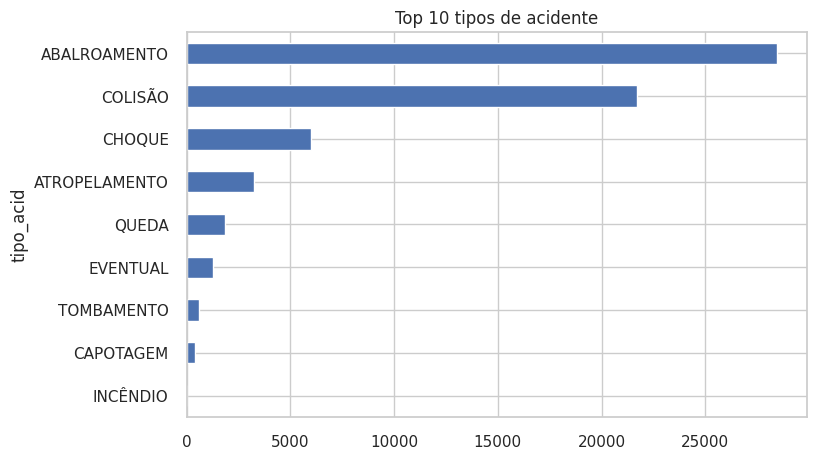

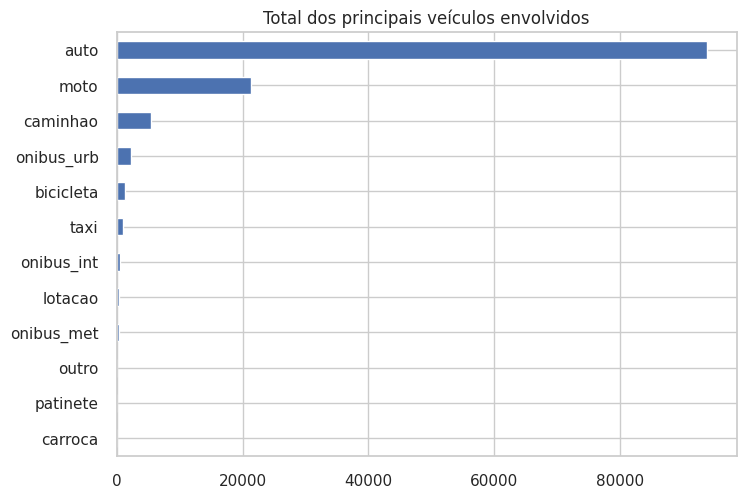

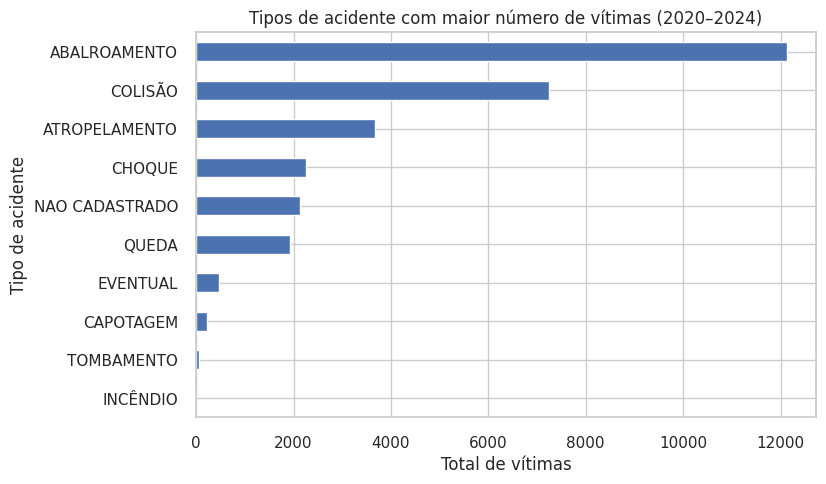

In [29]:
# Top 10 tipos de acidente
df_plot = (
    df_20_24["tipo_acid"]
    .replace("NAO CADASTRADO", np.nan)   # trata como missing
    .dropna()                            # remove para visualização
)

df_plot.value_counts().head(10).iloc[::-1].plot(kind="barh", figsize=(8,5))
plt.title("Top 10 tipos de acidente")
plt.show()


# Veículos mais envolvidos
df[cols_veiculos].sum().sort_values().plot(kind="barh")
plt.title("Total dos principais veículos envolvidos")
plt.show()


# Agrupa por tipo de acidente e soma vítimas
acidentes_vitimas = (
    df.groupby("tipo_acid")["total_vitimas"]
    .sum()
    .sort_values(ascending=False)
)

# Plot
acidentes_vitimas.head(10).plot(
    kind="barh", figsize=(8,5)
)
plt.title("Tipos de acidente com maior número de vítimas (2020–2024)")
plt.xlabel("Total de vítimas")
plt.ylabel("Tipo de acidente")
plt.gca().invert_yaxis()  # deixa o maior no topo
plt.show()

3) Severidade

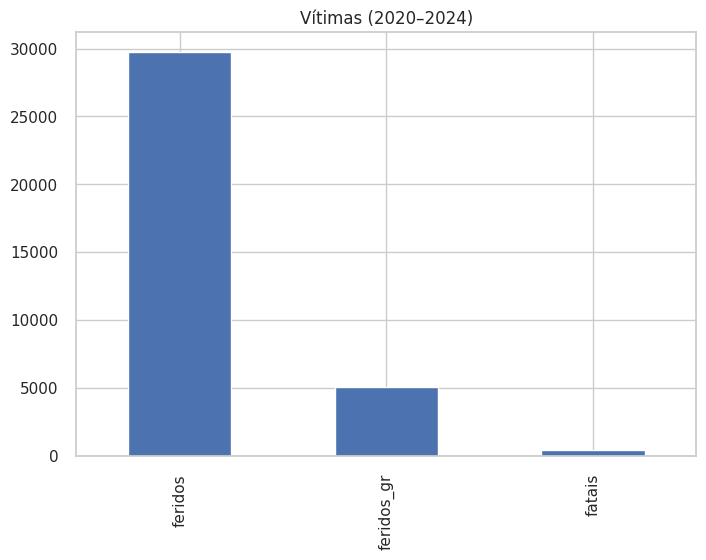

       veiculo  total_vitimas
0         auto          23579
1         moto          18503
2    bicicleta           1323
3   onibus_urb           1148
4     caminhao            941
5   onibus_int            249
6   onibus_met            212
7         taxi            159
8      lotacao            140
9     patinete             26
10     carroca             19
11       outro             13
tipo_acid
ATROPELAMENTO     118
CHOQUE            101
ABALROAMENTO       94
QUEDA              29
COLISÃO            26
CAPOTAGEM           6
TOMBAMENTO          2
NAO CADASTRADO      1
EVENTUAL            0
INCÊNDIO            0
Name: fatais, dtype: Int32


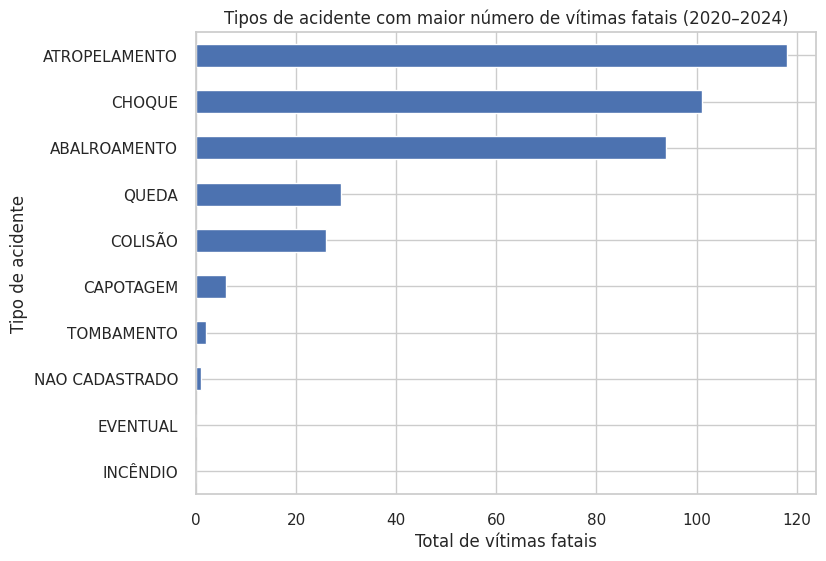

      veiculo  total_fatais
0        auto           217
1        moto           193
2    caminhao            39
3   bicicleta            18
4  onibus_urb            17
5  onibus_met             5
6     lotacao             4
7  onibus_int             3
8        taxi             2
9       outro             2


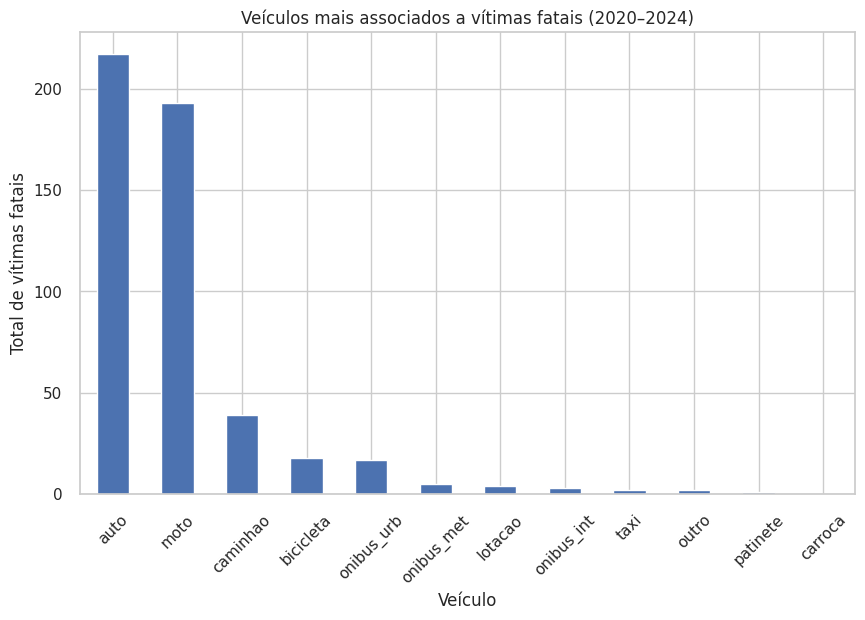

Taxa de vítimas fatais por veículo:



,veiculo,fatais_por_acidente
0,outro,0.05
1,patinete,0.04
2,onibus_met,0.01
3,bicicleta,0.01
4,moto,0.01
5,lotacao,0.01
6,onibus_urb,0.01
7,caminhao,0.01
8,onibus_int,0.01
9,auto,0.00


In [ ]:
# Distribuição de severidade (feridos, graves, fatais)
df[["feridos","feridos_gr","fatais"]].sum().plot(kind="bar")
plt.title("Vítimas (2020–2024)")
plt.show()


# Para cada veículo, soma o total de vítimas nos acidentes em que ele aparece
veiculos_vitimas = {}
for col in cols_veiculos:
    veiculos_vitimas[col] = df.loc[df[col] > 0, "total_vitimas"].sum()

# Transforma em DataFrame ordenado
df_veic_vitimas = (
    pd.Series(veiculos_vitimas)
    .sort_values(ascending=False)
    .rename("total_vitimas")
    .reset_index()
    .rename(columns={"index": "veiculo"})
)
print(df_veic_vitimas)


# Agrupa por tipo de acidente
acidentes_fatais = (
    df.groupby("tipo_acid")["fatais"]
    .sum()
    .sort_values(ascending=False)
)
print(acidentes_fatais.head(10))

# Tipos de acidente com mais vítimas fatais
acidentes_fatais.head(10).plot(
    kind="barh", figsize=(8,6)
)
plt.title("Tipos de acidente com maior número de vítimas fatais (2020–2024)")
plt.xlabel("Total de vítimas fatais")
plt.ylabel("Tipo de acidente")
plt.gca().invert_yaxis()
plt.show()


# Cria total de fatais sem nulo para evitar erro
df["total_fatais"] = df["fatais"].fillna(0)

# Calcula total de fatais por veículo
veiculos_fatais = {}
for veic in cols_veiculos:
    veiculos_fatais[veic] = df.loc[df[veic] > 0, "total_fatais"].sum()

df_veic_fatais = (
    pd.Series(veiculos_fatais)
    .sort_values(ascending=False)
    .rename("total_fatais")
    .reset_index()
    .rename(columns={"index": "veiculo"})
)

print(df_veic_fatais.head(10))

# Veículos mais fatais
df_veic_fatais.plot(
    x="veiculo", y="total_fatais",
    kind="bar", figsize=(10,6), legend=False
)
plt.title("Veículos mais associados a vítimas fatais (2020–2024)")
plt.xlabel("Veículo")
plt.ylabel("Total de vítimas fatais")
plt.xticks(rotation=45)
plt.show()


taxa_fatais = {}
for veic in cols_veiculos:
    total_acidentes = (df[veic] > 0).sum()
    total_fatais = df.loc[df[veic] > 0, "total_fatais"].sum()
    
    if total_acidentes > 0:
        taxa_fatais[veic] = total_fatais / total_acidentes
    else:
        taxa_fatais[veic] = 0

df_taxa_fatais = (
    pd.Series(taxa_fatais)
    .sort_values(ascending=False)
    .rename("fatais_por_acidente")
    .reset_index()
    .rename(columns={"index": "veiculo"})
)

print("Taxa de vítimas fatais por veículo:\n")
display(df_taxa_fatais)


4. Espacial

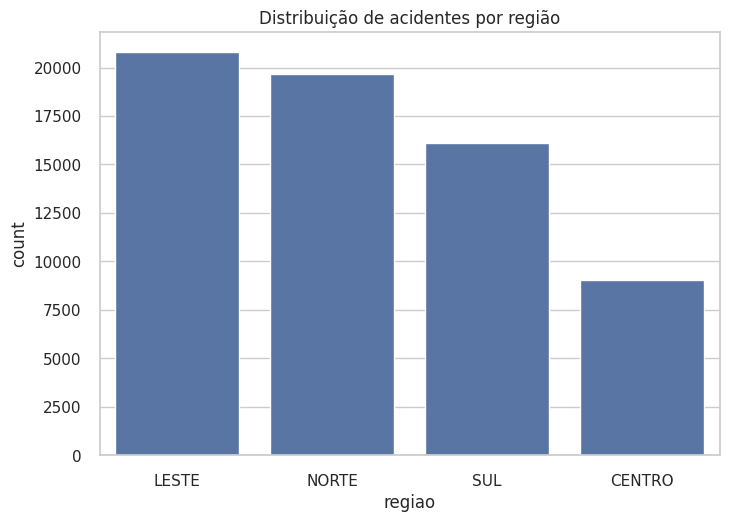

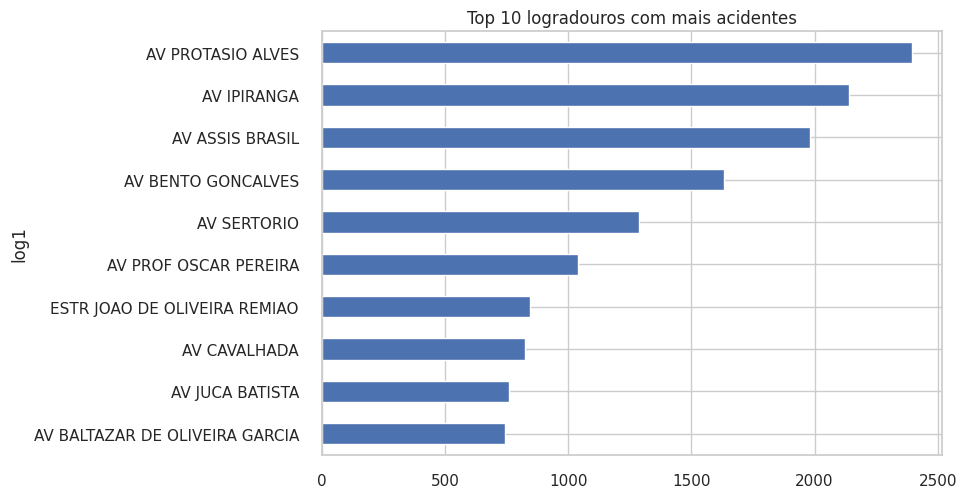

In [27]:
# Acidentes por região
sns.countplot(x="regiao", data=df,
              order=df["regiao"].value_counts().index)
plt.title("Distribuição de acidentes por região")
plt.show()

# Hotspots por logradouro
df["log1"].value_counts().head(10).sort_values().plot(kind="barh")
plt.title("Top 10 logradouros com mais acidentes")
plt.show()


5. Condições externas

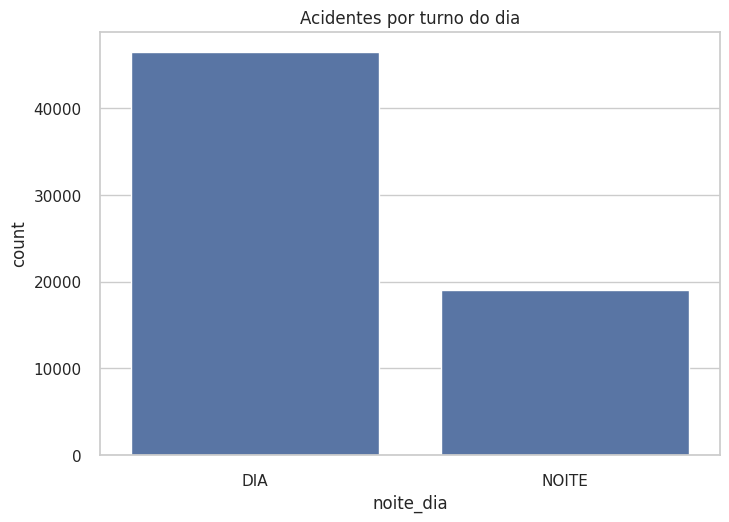

           feridos  fatais
noite_dia                 
DIA          18508     169
NOITE        11228     208


In [12]:
# Acidentes por turno (dia/noite)
sns.countplot(x="noite_dia", data=df_20_24)
plt.title("Acidentes por turno do dia")
plt.show()

# Severidade por turno
df_turno = df_20_24.groupby("noite_dia")[["feridos","fatais"]].sum()
print(df_turno)


6. Envolvidos

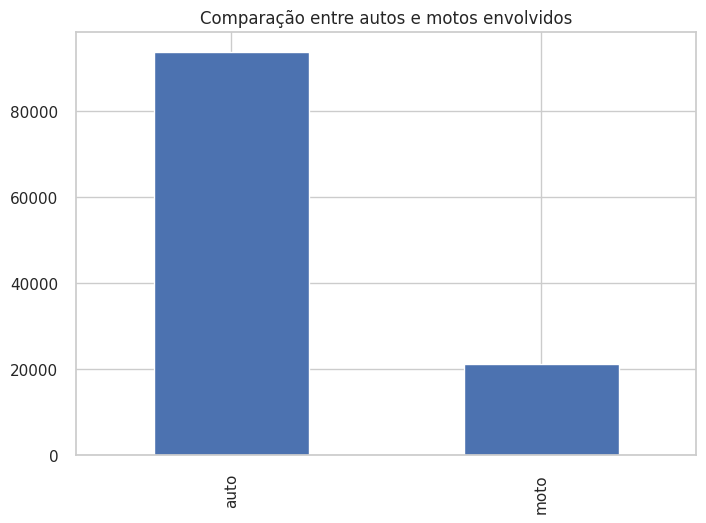

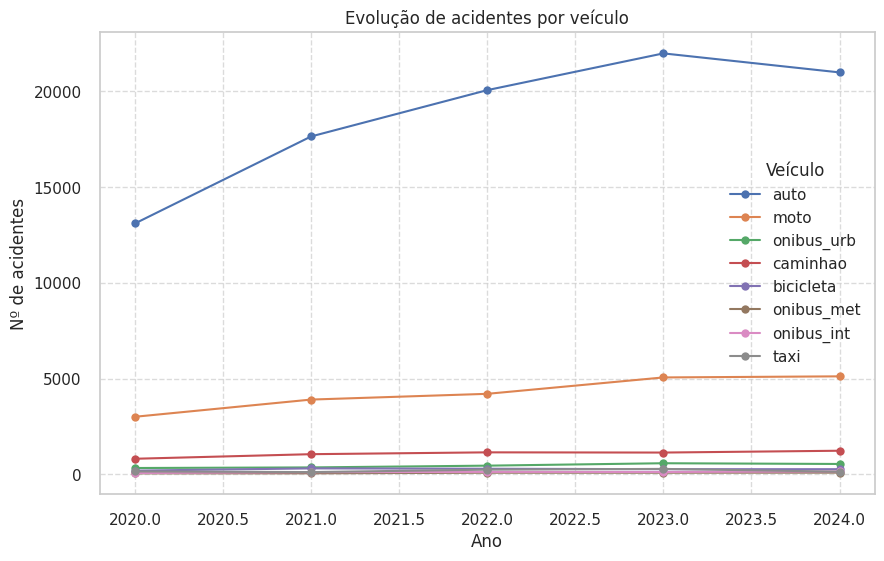

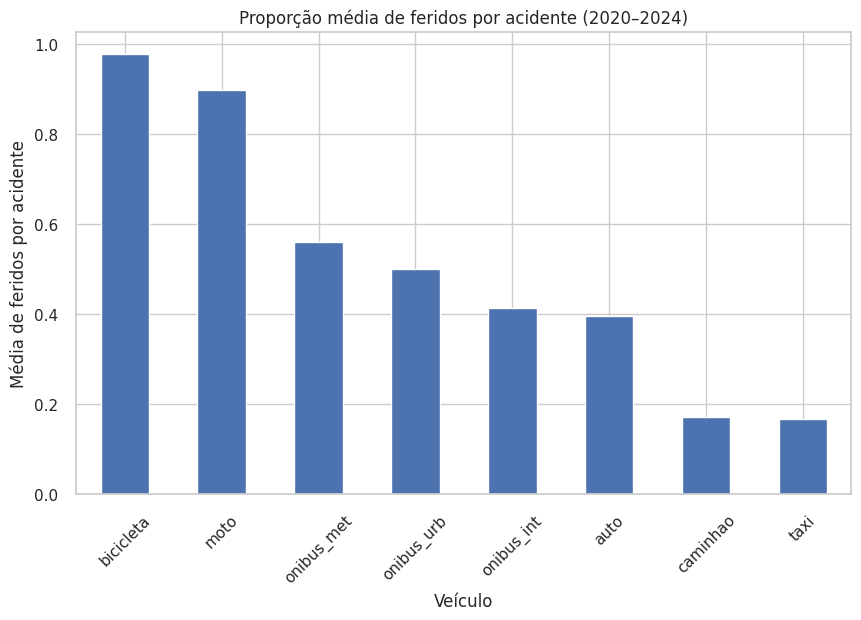

In [13]:
# Comparar proporção de acidentes com motos vs. automóveis
total_veic = df_20_24[["auto","moto"]].sum()
total_veic.plot(kind="bar")
plt.title("Comparação entre autos e motos envolvidos")
plt.show()

# Evolução temporal do envolvimento de bicicletas
evolucao_veiculos(df_20_24, cols_veiculos)

# Para cada veículo: soma feridos / soma acidentes em que ele aparece
proporcao_feridos = {}
for veic in cols_veiculos:
    total_acidentes = (df_20_24[veic] > 0).sum()
    total_feridos = df_20_24.loc[df_20_24[veic] > 0, "feridos"].sum()
    
    if total_acidentes > 0:
        proporcao_feridos[veic] = total_feridos / total_acidentes
    else:
        proporcao_feridos[veic] = 0

# Transforma em DataFrame
df_prop_feridos = (
    pd.Series(proporcao_feridos)
    .sort_values(ascending=False)
    .rename("feridos_por_acidente")
    .reset_index()
    .rename(columns={"index": "veiculo"})
)

# Plot
df_prop_feridos.plot(
    x="veiculo", y="feridos_por_acidente",
    kind="bar", figsize=(10,6), legend=False
)
plt.title("Proporção média de feridos por acidente (2020–2024)")
plt.xlabel("Veículo")
plt.ylabel("Média de feridos por acidente")
plt.xticks(rotation=45)
plt.show()